In [10]:
# Dependencies
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy as sa
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import datetime as dt
#plotting
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import datetime as datetime

In [11]:
# Create engine using the `demographics.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [12]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [13]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [14]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [15]:
# Assign the classes to variables called Station and Measurement
Station = Base.classes.station
Measurement = Base.classes.measurement

In [16]:
# The ORM’s “handle” to the database is the Session.
session = Session(engine)

In [17]:
# Total dates
session.query(func.count(Measurement.date)).all()

[(18103)]

In [18]:
# Query date for the Measurment date 1 year before
query_date = dt.date(2018, 5, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2017-05-23


In [19]:
#Design a query to retrieve the last 12 months of precipitation data.

query_results=session.query(Measurement.date,func.sum(Measurement.prcp)).\
    filter(Measurement.date > query_date).\
    order_by(Measurement.date).\
    group_by(func.strftime("%Y-%m-%d", Measurement.date)).all()


query_results
df = pd.DataFrame(query_results, columns=['date', 'precipitation']).set_index('date')
df

,precipitation
date,
2017-05-24,3.89
2017-05-25,2.22
2017-05-26,0.02
2017-05-27,0.51
2017-05-28,0.41
2017-05-29,0.42
2017-05-30,1.73
2017-05-31,0.37
2017-06-01,0.04


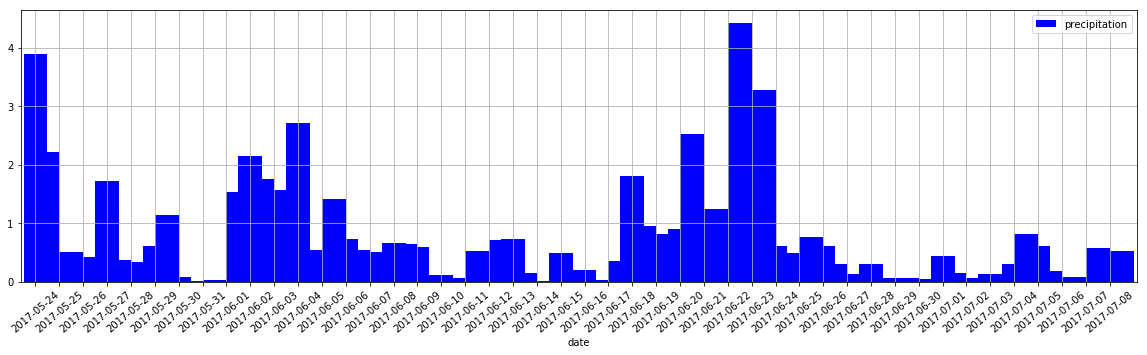

In [20]:
# Configure plot and ticks
n=2
ax=df.plot(kind="bar", x = df.index.values,facecolor="blue",width=2,figsize=(20,5))
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
ax.set_xlabel("date")
ax.set_xticklabels(ticklabels, rotation=40)
ax.grid(True)


In [21]:
#Use Pandas to print the summary statistics for the precipitation data.
df.describe()

,precipitation
count,92.000000
mean,0.641196
std,0.849694
min,0.000000
25%,0.070000
50%,0.410000
75%,0.732500
max,4.420000


In [22]:
#Station Analysis

#Design a query to calculate the total number of stations.
query_results=session.query(Station.name).count()

print(f"the total number of stations is: {query_results}")
#Design a query to find the most active stations.
query_most_active_stations = session.query(Station.name,func.count(Measurement.station)).\
            filter(Measurement.station == Station.station).\
            order_by(func.count(Measurement.station).desc()).\
            group_by(Station.name).limit(3).all()

print(f"Most active 3 stations are: {query_most_active_stations}")
            
#List the stations and observation counts in descending order
#Which station has the highest number of observations?
query_most_observ = session.query(Station.name,func.count(Measurement.station)).\
             filter(Measurement.station == Station.station).\
             order_by(func.count(Measurement.station).desc()).\
             group_by(Station.name).all()

print(f"Stations with most observations in descending order are: {query_most_observ}")

#Which station has the highest number of observations?
query_highest_observ = session.query(Station.name,func.count(Measurement.station)).\
             filter(Measurement.station == Station.station).\
             order_by(func.count(Measurement.station).desc()).\
             group_by(Station.name).limit(1).all()

print(f"highest number of observations: {query_highest_observ}")

#Design a query to retrieve the last 12 months of temperature observation data (tobs).
query_last_12_mos_tobs = session.query(Measurement.date,Measurement.station,Measurement.tobs).\
    filter(Measurement.date > query_date).\
    order_by(Measurement.date).all()

print(f"last 12 months of temperature observation data (tobs): {query_last_12_mos_tobs}")
    
#Filter by the station with the highest number of observations.


query_last_12_mos_tobs_highest = session.query(Measurement.date,Measurement.station,Measurement.tobs).\
    filter(Measurement.date > query_date, Measurement.station == Station.station, Station.name=='WAIHEE 837.5, HI US').\
    order_by(Measurement.date).all()
    
print(f"last 12 months of temperature observation data (tobs) filtered by station with most observations: {query_last_12_mos_tobs_highest}")

the total number of stations is: 9
Most active 3 stations are: [('WAIHEE 837.5, HI US', 2772), ('KANEOHE 838.1, HI US', 2696), ('WAIKIKI 717.2, HI US', 2685)]
Stations with most observations in descending order are: [('WAIHEE 837.5, HI US', 2772), ('KANEOHE 838.1, HI US', 2696), ('WAIKIKI 717.2, HI US', 2685), ('WAIMANALO EXPERIMENTAL FARM, HI US', 2572), ('MANOA LYON ARBO 785.2, HI US', 2484), ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 1937), ('HONOLULU OBSERVATORY 702.2, HI US', 1932), ('PEARL CITY, HI US', 683), ('UPPER WAHIAWA 874.3, HI US', 342)]
highest number of observations: [('WAIHEE 837.5, HI US', 2772)]
last 12 months of temperature observation data (tobs): [('2017-05-24', 'USC00519397', 77), ('2017-05-24', 'USC00513117', 75), ('2017-05-24', 'USC00514830', 76), ('2017-05-24', 'USC00519523', 76), ('2017-05-24', 'USC00519281', 74), ('2017-05-24', 'USC00516128', 70), ('2017-05-25', 'USC00519397', 77), ('2017-05-25', 'USC00513117', 69), ('2017-05-25', 'USC00514830', 79), ('2017-

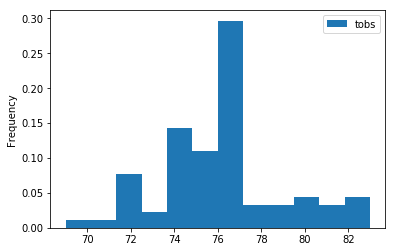

In [23]:
#Plot the results as a histogram with bins=12.

df_tobs = pd.DataFrame(query_last_12_mos_tobs_highest, columns=['date', 'station','tobs']).set_index('date')
df
x = df_tobs['tobs']
plt.hist(x, normed=True, bins=12)
plt.ylabel('Frequency');
#create legend
handles = [Rectangle((0,0),1,1)]
labels= ["tobs"]
plt.legend(handles, labels)


In [38]:
#Temperature Analysis


#Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d 
#and return the minimum, average, and maximum temperatures for that range of dates.
#Use the calc_temps function to calculate the min, avg, and max temperatures for your trip 
#using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

# def calc_temps(*passed_arguments):
#     query = Session.query(t).filter(t.column_c.in_(passed_arguments)).all()
#     query_last_12_mos_tobs_highest = session.query(Measurement.date,Measurement.station,Measurement.tobs).\
#     filter(Measurement.date > query_date, Measurement.station == Station.station, Station.name=='WAIHEE 837.5, HI US').\
#     order_by(Measurement.date).all()
#     # ... do some work with query
#     return some_value

def calc_temps(startDateVar,endDateVar):
      query_last_12_mos = session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)).\
        filter(Measurement.date > startDateVar, Measurement.date < endDateVar).all()
      return query_last_12_mos

# t = datetime.datetime(2012, 2, 23, 0, 0)
# t.strftime('%m/%d/%Y')


# def func1(date1,date2):
#       strDate1 =  date1.strftime('%m/%d/%Y')
#       strDate2 =  date2.strftime('%m/%d/%Y')

#       sql = "select top 10000 * from Pretty_Txns where Pay_Date > '%s' and Pay_Date < '%s'  " %    (strDate1, strDate2)
#       return sql

sqlquery_temps = calc_temps("2017-01-01","2017-01-15" )
print(sqlquery_temps)
df_temp = pd.DataFrame(sqlquery_temps, columns=['min', 'avg','max'])
df_temp

[(60, 68.21428571428571, 78)]


,min,avg,max
0,60,68.214286,78


0    68.214286
Name: avg, dtype: float64


<Container object of 3 artists>

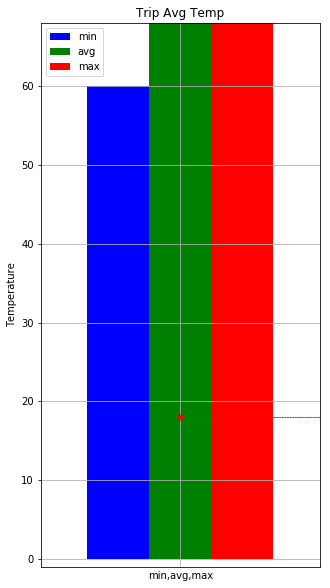

In [124]:
#Plot the min, avg, and max temperature from your previous query as a bar chart.

#Use the average temperature as the bar height.
print(df_temp["avg"])
yheight=df_temp["avg"].to_string(index=False)
yht= (round(float(yheight)))
n=20
xvalues=df_temp["min"].to_string(index=False)
axtemp=df_temp.plot(kind="bar", x = [df_temp["min"],df_temp["avg"],df_temp["max"]],color=["blue","green","red"],width=1,figsize=(5,10))
plt.ylabel('Temperature');
axtemp.set_ylim(-1, yht)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
axtemp.set_title('Trip Avg Temp')

axtemp.grid(True)
ymax=df_temp["max"].to_string(index=False)
ymx=(round(float(ymax)))
ymin=df_temp["min"].to_string(index=False)
ymn=(round(float(ymin)))
#Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).
yerr=ymx-ymn
plt.errorbar(x, yerr, color='r', marker='o', markersize=5, linestyle='dashed', linewidth=0.5)


